In [1]:
import pandas as pd

In [119]:
euData = pd.read_csv('data/EUBeefPricesWeekly.csv',
                    parse_dates=['Week - Begin Date'])

euData.drop(columns=['Member State Code','Week - End Date', 'Week Number', 'Unit'], inplace=True)

In [120]:
euData = euData[(euData['Member State Name'] == 'Ireland') | (euData['Member State Name'] == 'France')]
euData = euData[euData['Category'].isin(['Heifers', 'Cows', 'Steers', 'Bulls'])].reset_index(drop=True)



In [121]:
test = euData.groupby(['Member State Name', 'Category']).resample('M', on='Week - Begin Date').mean()
test.reset_index(inplace=True)
test.rename(columns={'Week - Begin Date': 'Date'}, inplace=True)
#test.set_index('Date', drop=True, inplace=True)
test.Category = test['Member State Name'] + ' ' + test['Category']
test.drop(columns='Member State Name', inplace=True)
ind = test.Date.unique()
cols = test.Category.unique()
#test.Date = test.Date.dt.strftime('%Y-%m')
test

,Category,Date,Price
0,France Bulls,2000-01-31,233.700000
1,France Bulls,2000-02-29,235.650000
2,France Bulls,2000-03-31,236.283333
3,France Bulls,2000-04-30,222.975000
4,France Bulls,2000-05-31,235.150000
...,...,...,...
2162,Ireland Steers,2022-06-30,NaN
2163,Ireland Steers,2022-07-31,437.800000
2164,Ireland Steers,2022-08-31,NaN
2165,Ireland Steers,2022-09-30,NaN


In [122]:
test2 = test.pivot_table(index='Date', columns='Category', values='Price')
test2.columns = cols
#test.index = ind
test2

,France Bulls,France Cows,France Heifers,France Steers,Ireland Bulls,Ireland Cows,Ireland Heifers,Ireland Steers
Date,,,,,,,,
2000-01-31,233.700000,231.950000,321.050000,299.325000,NaN,164.000,232.625000,249.100000
2000-02-29,235.650000,237.625000,320.125000,300.900000,NaN,171.325,238.400000,247.150000
2000-03-31,236.283333,246.150000,326.500000,302.300000,NaN,174.200,237.416667,246.416667
2000-04-30,222.975000,242.225000,318.775000,295.800000,NaN,179.050,242.400000,245.000000
2000-05-31,235.150000,263.575000,334.600000,307.300000,NaN,208.975,256.975000,262.100000
...,...,...,...,...,...,...,...,...
2021-12-31,327.200000,349.000000,428.800000,396.000000,319.280000,344.980,425.780000,422.100000
2022-01-31,352.666667,380.333333,448.666667,425.666667,353.933333,359.500,437.200000,433.066667
2022-03-31,342.000000,366.000000,440.000000,418.000000,348.700000,353.100,434.000000,430.200000


In [123]:
test2.isna().sum()

France Bulls        0
France Cows         0
France Heifers      0
France Steers       0
Ireland Bulls      31
Ireland Cows        0
Ireland Heifers     0
Ireland Steers      0
dtype: int64

<AxesSubplot:xlabel='Date'>

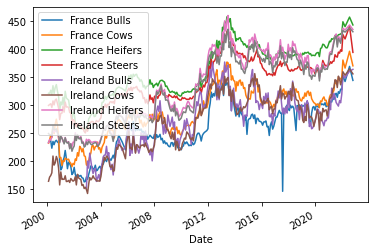

In [125]:
test2.plot()